# EMAIL SPAM OR HAM PREDICTION USING RANDOMFOREST CLASSIFIER

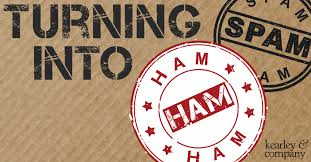

### The goal is to build a classification model for the given spam_mail_dataset
### In doing so we'll check for the accuracy of the model built using the real life data acquired from kaggle


In [1]:
#Loading the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
raw_mail=pd.read_csv('spam_ham_dataset.csv')
raw_mail

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
#Dropping the unwanted rows
raw_mail_refined=raw_mail.drop(['Unnamed: 0','label_num'],axis=1)
raw_mail_refined

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [4]:
#Filling the missing data
mail_data=raw_mail_refined.where((pd.notnull(raw_mail_refined)),"")
mail_data

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [5]:
#Converting categorical labels to numeric
mail_data.loc[mail_data['label']=='spam','label']=0
mail_data.loc[mail_data['label']=='ham','label']=1

In [6]:
mail_data

,label,text
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,1,Subject: put the 10 on the ft\r\nthe transport...
5167,1,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,1,Subject: calpine daily gas nomination\r\n>\r\n...
5169,1,Subject: industrial worksheets for august 2000...


In [7]:
X=mail_data['text']
Y=mail_data['label']

In [8]:
print(X)
print(Y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object
0       1
1       1
2       1
3       0
4       1
       ..
5166    1
5167    1
5168    1
5169    1
5170    0
Name: label, Length: 5171, dtype: object


In [9]:
#Splitting the data for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
print(X_train.shape)
print(X_test.shape)

(4136,)
(1035,)


In [11]:
#USING FEATURE EXTRACION FOR CONVERTING TEXTUAL DATA INTO NUMERIC(SO IT"LL BE EASIER FOR THE PROGRAM TO UNDERSTAND IT BETTER)
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

#Converting the values inside 'Y' column to integer(Optional)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [12]:
print(X_train_features)

  (0, 39122)	0.1489707406646257
  (0, 21876)	0.15452467049357102
  (0, 39295)	0.18296953062812027
  (0, 28331)	0.100413186925558
  (0, 16641)	0.1637097662727073
  (0, 25343)	0.1327903166471815
  (0, 24291)	0.086819999802958
  (0, 25011)	0.09352929013170533
  (0, 35741)	0.1797981565768853
  (0, 38670)	0.12368485263465394
  (0, 12407)	0.11614143442868556
  (0, 64)	0.2320330901784706
  (0, 72)	0.11287588933297091
  (0, 2003)	0.22022236239236187
  (0, 56)	0.19294689361509368
  (0, 28212)	0.13465733801362062
  (0, 26193)	0.13355578907978374
  (0, 17814)	0.15230033297810594
  (0, 27541)	0.15176632211845267
  (0, 12467)	0.19120758987148667
  (0, 35035)	0.2927898419075641
  (0, 4132)	0.5855796838151281
  (0, 26894)	0.29612657680252463
  (0, 37566)	0.03390898877474294
  (1, 2308)	0.12427819881705193
  :	:
  (4135, 36363)	0.10387970460445373
  (4135, 37874)	0.1099845935208329
  (4135, 2822)	0.12063179979974499
  (4135, 38317)	0.10810759560254152
  (4135, 40607)	0.10560544386588379
  (4135, 40291

In [13]:
#Model Building
model=RandomForestClassifier()
model.fit(X_train_features,Y_train)

RandomForestClassifier()

In [14]:
#Model training
prediction_training_data=model.predict(X_train_features)
accuracy_training_data=accuracy_score(Y_train,prediction_training_data)
accuracy_training_data*100

100.0

In [15]:
#Model testing
prediction_test_data=model.predict(X_test_features)
accuracy_test_data=accuracy_score(Y_test,prediction_test_data)
accuracy_test_data*100

97.487922705314

In [16]:
#BUILDING A PREDICTIVE MODEL
input_mail=["Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."]
input_mail_features=feature_extraction.transform(input_mail)
prediction=model.predict(input_mail_features)
prediction

if prediction[0]==1:
    print("Mail is ham")
else:
    print("Mail is spam")

Mail is ham
